In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
input_path = '/content/drive/MyDrive/Customer_Churn/dataset/credit_card_churn_100k.csv'

✅

In [4]:
def load_data(input_path):

  # Read the CSV file
  df = pd.read_csv(input_path)
  print("✅ Succesfully loaded the dataset")

  # Drop CLIENTNUM
  df.drop('CLIENTNUM', axis=1, inplace=True)

  return df

In [5]:
credit_card_churn_df = load_data(input_path)

✅ Succesfully loaded the dataset


In [6]:
pd.set_option('display.max_columns', None)
credit_card_churn_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Last_Transaction_Date
0,49,F,2,High School,Married,Less than $40K,Silver,34,4,2,0,4710.0,3137.0,1573.0,0.550,2448.0,38,0.817,0.666,Existing Customer,2023-11-05
1,30,M,2,High School,Married,$40K - $60K,Blue,30,3,1,0,6038.0,824.0,5214.0,0.520,10069.0,26,1.099,0.136,Attrited Customer,2022-08-14
2,41,M,1,High School,Divorced,$40K - $60K,Blue,50,2,1,1,3924.0,3044.0,880.0,1.113,6389.0,112,0.674,0.776,Existing Customer,2023-02-12
3,43,M,3,College,Married,$60K - $80K,Blue,40,4,3,0,9226.0,855.0,8371.0,0.157,14261.0,106,1.160,0.093,Attrited Customer,2023-01-05
4,37,F,2,Post-Graduate,Single,Less than $40K,Blue,26,4,1,2,2734.0,1143.0,1591.0,0.736,3046.0,30,0.755,0.418,Existing Customer,2024-01-15


In [7]:
credit_card_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_Age              100000 non-null  int64  
 1   Gender                    100000 non-null  object 
 2   Dependent_count           100000 non-null  int64  
 3   Education_Level           100000 non-null  object 
 4   Marital_Status            100000 non-null  object 
 5   Income_Category           100000 non-null  object 
 6   Card_Category             100000 non-null  object 
 7   Months_on_book            100000 non-null  int64  
 8   Total_Relationship_Count  100000 non-null  int64  
 9   Months_Inactive_12_mon    100000 non-null  int64  
 10  Contacts_Count_12_mon     100000 non-null  int64  
 11  Credit_Limit              100000 non-null  float64
 12  Total_Revolving_Bal       100000 non-null  float64
 13  Avg_Open_To_Buy           100000 non-null  fl

In [32]:
credit_card_churn_df['Last_Transaction_Date'] = pd.to_datetime(credit_card_churn_df['Last_Transaction_Date'])
credit_card_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99954 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_Age              99954 non-null  int64         
 1   Gender                    99954 non-null  object        
 2   Dependent_count           99954 non-null  int64         
 3   Education_Level           99954 non-null  object        
 4   Marital_Status            99954 non-null  object        
 5   Income_Category           99954 non-null  object        
 6   Card_Category             99954 non-null  object        
 7   Months_on_book            99954 non-null  int64         
 8   Total_Relationship_Count  99954 non-null  int64         
 9   Months_Inactive_12_mon    99954 non-null  int64         
 10  Contacts_Count_12_mon     99954 non-null  int64         
 11  Credit_Limit              99954 non-null  float64       
 12  Total_Revolving_Bal    

# Statistical Analysis

In [9]:
def display_dataset_summary(df):
    """Display summary statistics for credit card churn dataset"""
    print("\n" + "="*60)
    print("CREDIT CARD CHURN DATASET SUMMARY")
    print("="*60)

    print(f"\nDataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

    print("\n💳 CHURN DISTRIBUTION:")
    churn_counts = df['Attrition_Flag'].value_counts()
    for flag, count in churn_counts.items():
        print(f"{flag}: {count:,} ({count/len(df):.1%})")

    print("\n👥 DEMOGRAPHIC SUMMARY:")
    print(f"Age: {df['Customer_Age'].min()}-{df['Customer_Age'].max()} years (avg: {df['Customer_Age'].mean():.1f})")
    print(f"Gender Distribution:\n{df['Gender'].value_counts()}")
    print(f"Education Level Distribution:\n{df['Education_Level'].value_counts()}")

    print("\n💰 FINANCIAL SUMMARY:")
    print(f"Credit Limit: ${df['Credit_Limit'].min():,.0f} - ${df['Credit_Limit'].max():,.0f}")
    print(f"Average Credit Limit: ${df['Credit_Limit'].mean():,.0f}")
    print(f"Average Revolving Balance: ${df['Total_Revolving_Bal'].mean():,.0f}")
    print(f"Average Utilization: {df['Avg_Utilization_Ratio'].mean():.1%}")

    print("\n📊 TRANSACTION PATTERNS:")
    print(f"Total Transaction Amount: ${df['Total_Trans_Amt'].min():,.0f} - ${df['Total_Trans_Amt'].max():,.0f}")
    print(f"Average Transaction Amount: ${df['Total_Trans_Amt'].mean():,.0f}")
    print(f"Average Transaction Count: {df['Total_Trans_Ct'].mean():.1f}")
    print(f"Average Months on Book: {df['Months_on_book'].mean():.1f}")

def analyze_churn_patterns(df):
    """Analyze churn patterns specific to credit card data"""
    print("\n" + "="*60)
    print("CREDIT CARD CHURN ANALYSIS")
    print("="*60)

    # Churn by card category
    print("\n💳 CHURN BY CARD CATEGORY:")
    card_churn = df.groupby('Card_Category')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())
    print(card_churn.map('{:.1%}'.format))

    # Churn by income category
    print("\n💰 CHURN BY INCOME CATEGORY:")
    income_churn = df.groupby('Income_Category')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())
    print(income_churn.map('{:.1%}'.format))

    # Churn by activity level
    print("\n📱 CHURN BY ACTIVITY LEVEL:")
    activity_churn = df.groupby('Months_Inactive_12_mon')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())
    print("Months Inactive -> Churn Rate")
    for months, rate in activity_churn.items():
        print(f"{months} months: {rate:.1%}")

    # Utilization analysis
    print("\n📊 CHURN BY UTILIZATION RATIO:")
    df['Utilization_Group'] = pd.cut(df['Avg_Utilization_Ratio'],
                                   bins=[0, 0.1, 0.3, 0.7, 1.0],
                                   labels=['Low (0-10%)', 'Moderate (10-30%)',
                                          'High (30-70%)', 'Very High (70%+)'])
    util_churn = df.groupby('Utilization_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())
    print(util_churn.map('{:.1%}'.format))

In [10]:
 # Display summary
display_dataset_summary(credit_card_churn_df)

# Analyze churn patterns
analyze_churn_patterns(credit_card_churn_df)


CREDIT CARD CHURN DATASET SUMMARY

Dataset Shape: (100000, 21)
Memory Usage: 48.76 MB

💳 CHURN DISTRIBUTION:
Existing Customer: 79,714 (79.7%)
Attrited Customer: 20,286 (20.3%)

👥 DEMOGRAPHIC SUMMARY:
Age: 18-73 years (avg: 45.5)
Gender Distribution:
Gender
F    52910
M    47090
Name: count, dtype: int64
Education Level Distribution:
Education_Level
Graduate         29799
College          24997
High School      20100
Post-Graduate    15039
Doctorate         5050
Uneducated        3048
Unknown           1967
Name: count, dtype: int64

💰 FINANCIAL SUMMARY:
Credit Limit: $1,500 - $69,990
Average Credit Limit: $12,294
Average Revolving Balance: $4,932
Average Utilization: 40.0%

📊 TRANSACTION PATTERNS:
Total Transaction Amount: $26 - $95,920
Average Transaction Amount: $6,882
Average Transaction Count: 54.1
Average Months on Book: 35.5

CREDIT CARD CHURN ANALYSIS

💳 CHURN BY CARD CATEGORY:
Card_Category
Blue        21.1%
Gold        15.2%
Platinum    14.4%
Silver      18.5%
Name: Attritio

/tmp/ipython-input-2313994942.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_churn = df.groupby('Utilization_Group')['Attrition_Flag'].apply(lambda x: (x == 'Attrited Customer').mean())


# Missing Values Analysis

In [11]:
def missing_values(df):

  #Missing values analysis
  missing_analysis = df.isnull().sum() / len(df) * 100

  #Plot the missing values bar plot
  plt.figure(figsize=(10, 6))
  sns.barplot(x=missing_analysis.index, y=missing_analysis.values)
  plt.xticks(rotation=90)
  plt.xlabel('Columns')
  plt.ylabel('Missing Values (%)')
  plt.title('Missing Values Analysis')
  plt.show()

  return missing_analysis

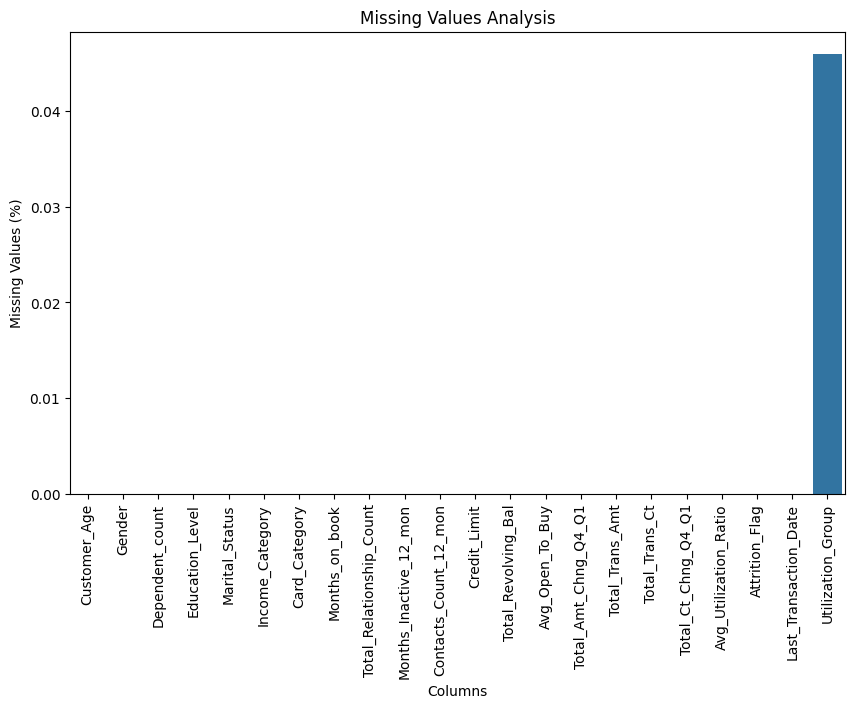

,0
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,0.000
Marital_Status,0.000
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000
Total_Relationship_Count,0.000
Months_Inactive_12_mon,0.000


In [12]:
missing_values(credit_card_churn_df)

We can observe that there are is 5.5% of missing value in the Utilization_Group.

Therefore, it is best practice to drop the rows in Utilization_Group, as it is a category object.

In [13]:
def missing_values_deletion(df):
  df.dropna(subset=['Utilization_Group'], inplace=True)
  return df

In [14]:
removed_missing_values_df = missing_values_deletion(credit_card_churn_df)

# Outlier detection for both categorical and numerical columns

Usage of Countplots:
- Categorical Customer Demographics: Gender, Education_Level, Marital_Status, Income_Category, Customer_Age

- Categorical Account Charateristics: Attrition_Flag           

- Cateogorical Behavioural Indicators: Utilization_Group  

Usage of Boxplot used for the numerical columns

- Numerical Customer Demographics: Dependent_count

- Numerical Account Characteristics: Months_on_book, Total_Relationship_Count, Credit_Limit,  Avg_Open_To_Buy, Total_Revolving_Bal, Avg_Utilization_Ratio

- Numerical  Behavioural Indicators: Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Months_Inactive_12_mon, Contacts_Count_12_mon


In [15]:
# Generate countplots
def plot_categorical_distributions(df, cols, section_title):
    num_cols = len(cols)

    if num_cols == 0:
        print(f"No columns to plot for {section_title}.")
        return

    if num_cols == 1:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        plt.suptitle(section_title, fontsize=16, y=1.05)
        sns.countplot(ax=ax, x=cols[0], data=df, palette='viridis', hue=cols[0], legend=False)
        ax.set_title(cols[0])
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        num_rows = (num_cols + 1) // 2  # 2 plots per row (1x2 grid)
        fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
        axes = axes.flatten()

        plt.suptitle(section_title, fontsize=16, y=1.05) # Increased y value to move title higher

        # Generate countplots for each categorical feature
        for i, col in enumerate(cols):
            if i < len(axes):
                sns.countplot(ax=axes[i], x=col, data=df, palette='viridis', hue=col, legend=False)
                axes[i].set_title(col)
                axes[i].set_xlabel('')
                axes[i].set_ylabel('Count')
                axes[i].tick_params(axis='x', rotation=45) # Rotate labels for better readability

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjusted rect to make space for the suptitle
        plt.show()

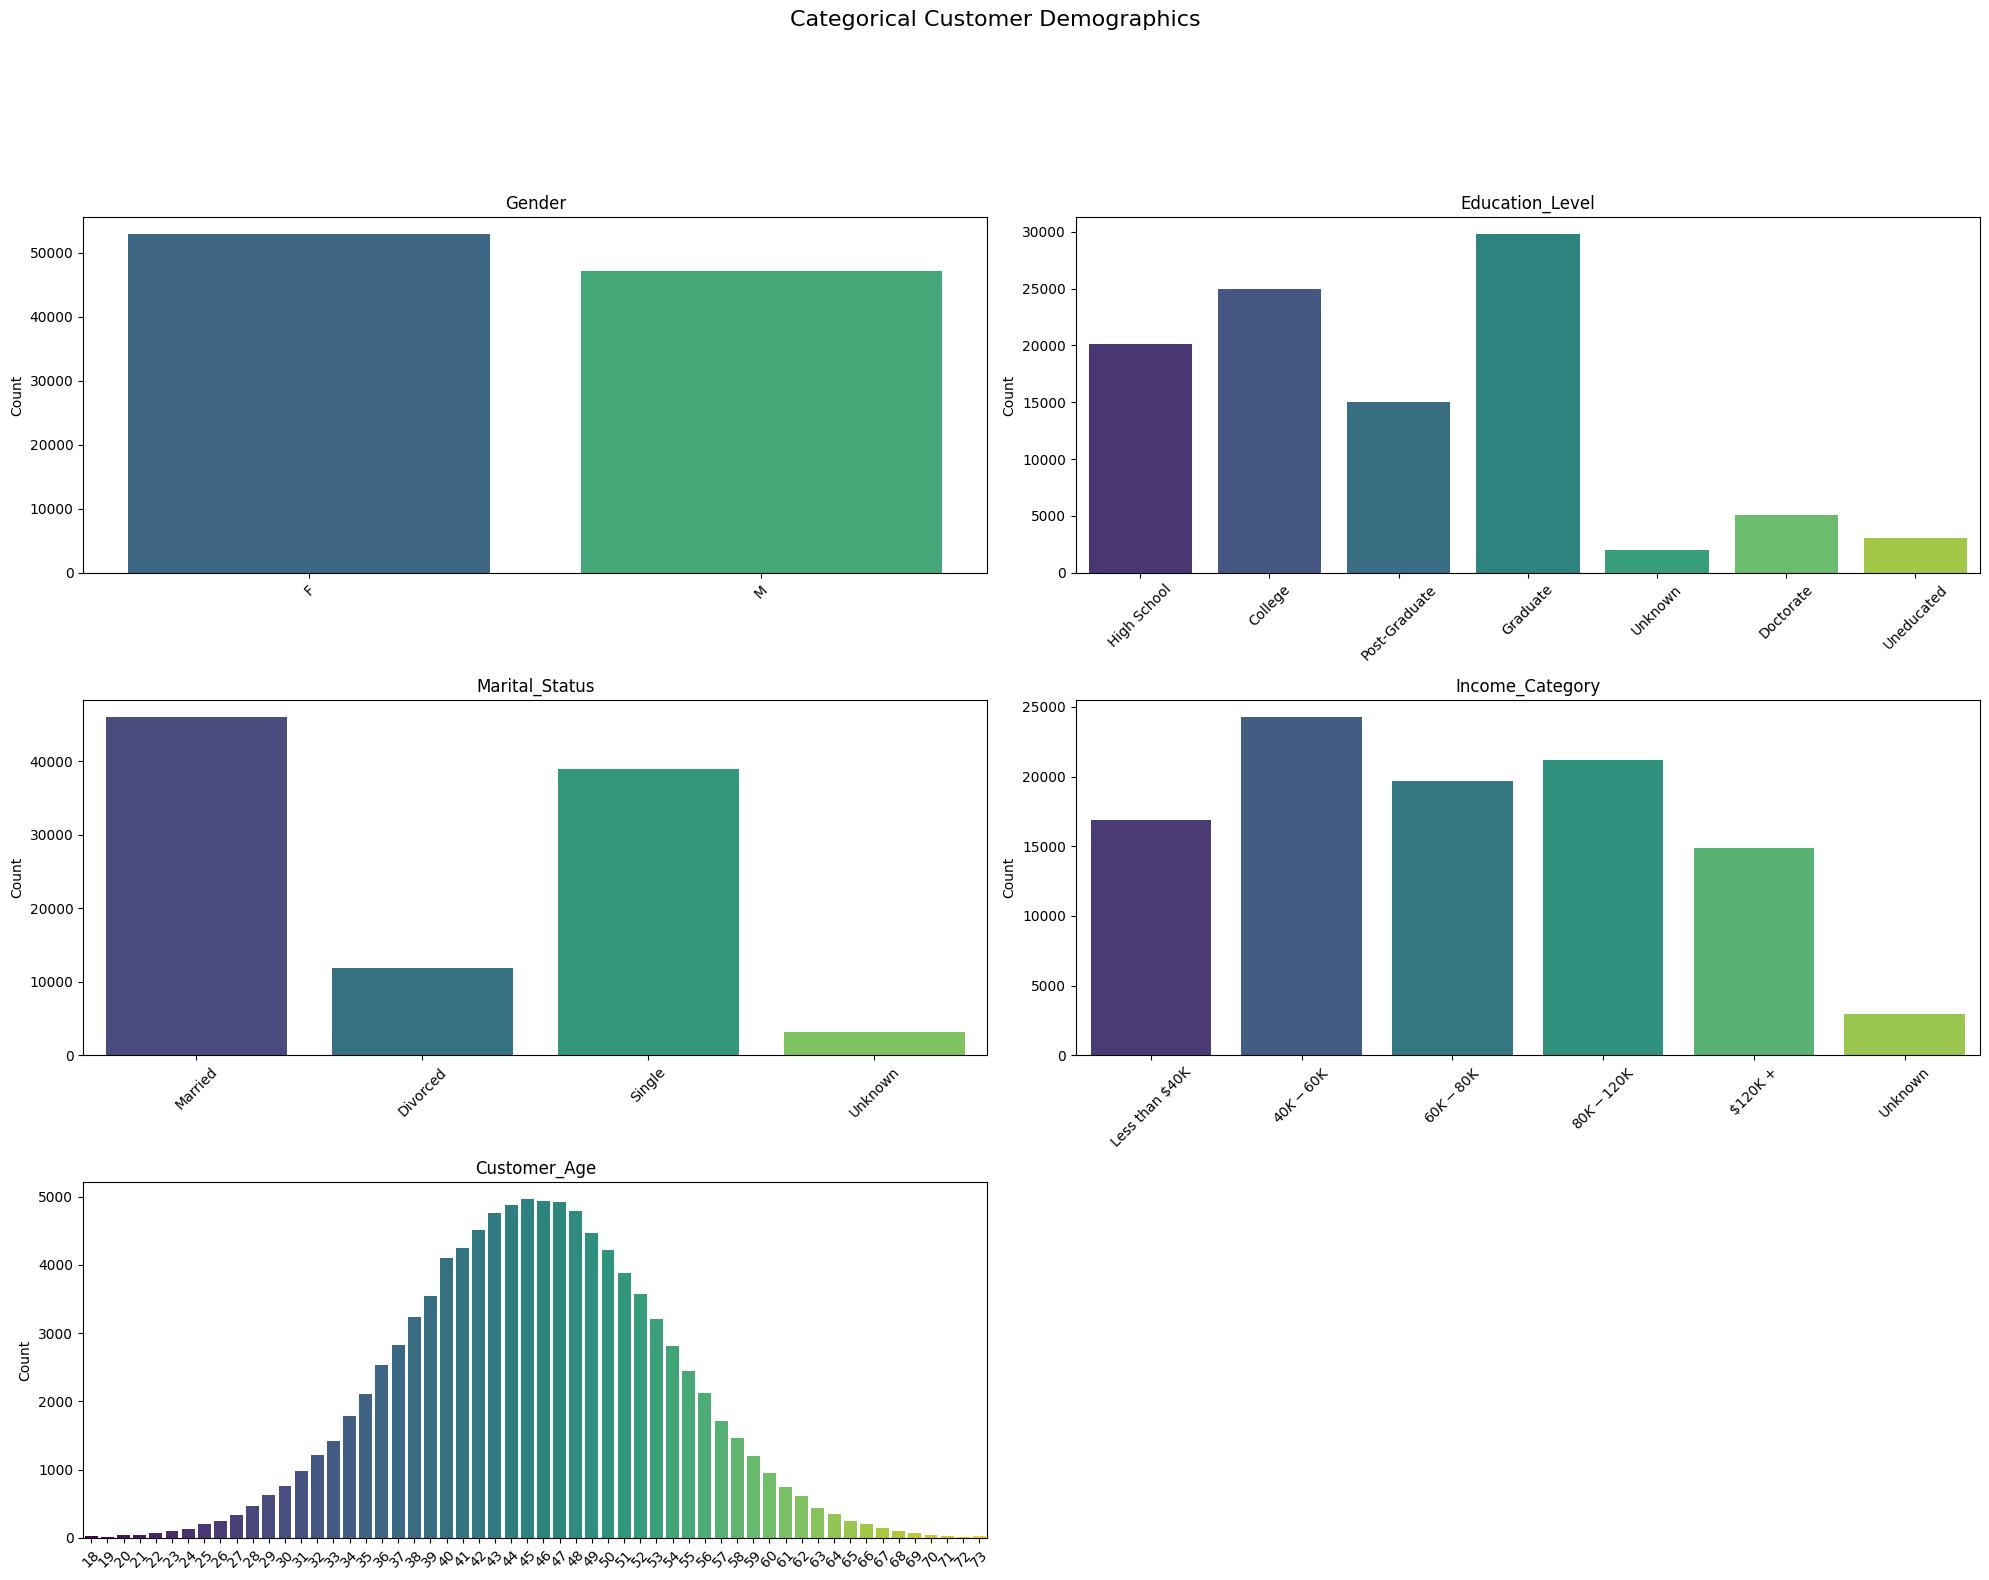

In [16]:
categorical_customer_demographics = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Customer_Age']
plot_categorical_distributions(removed_missing_values_df, categorical_customer_demographics, "Categorical Customer Demographics")

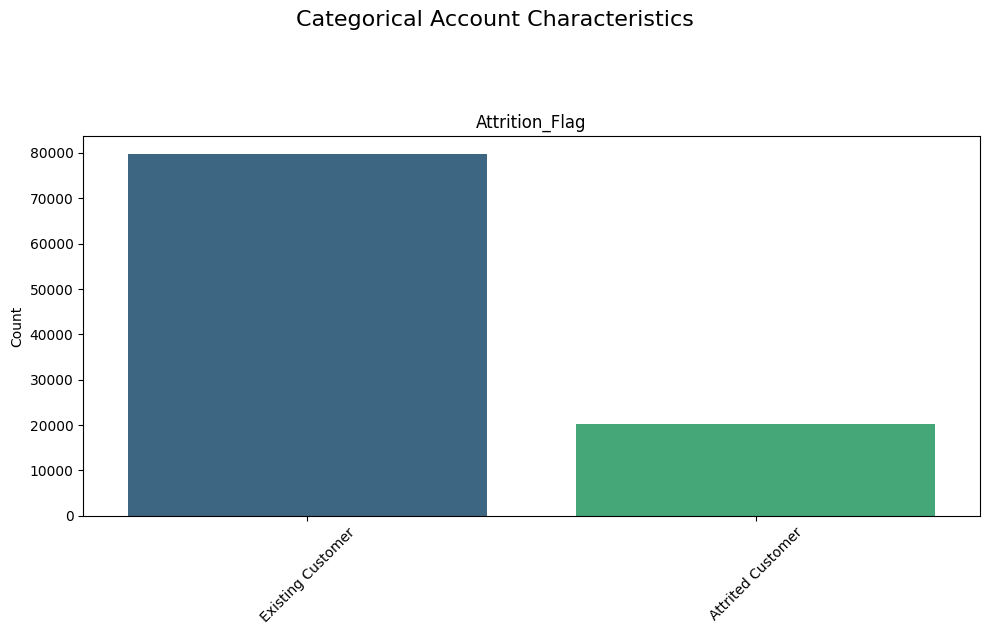

In [17]:
plot_categorical_distributions(removed_missing_values_df, ['Attrition_Flag'], "Categorical Account Characteristics")

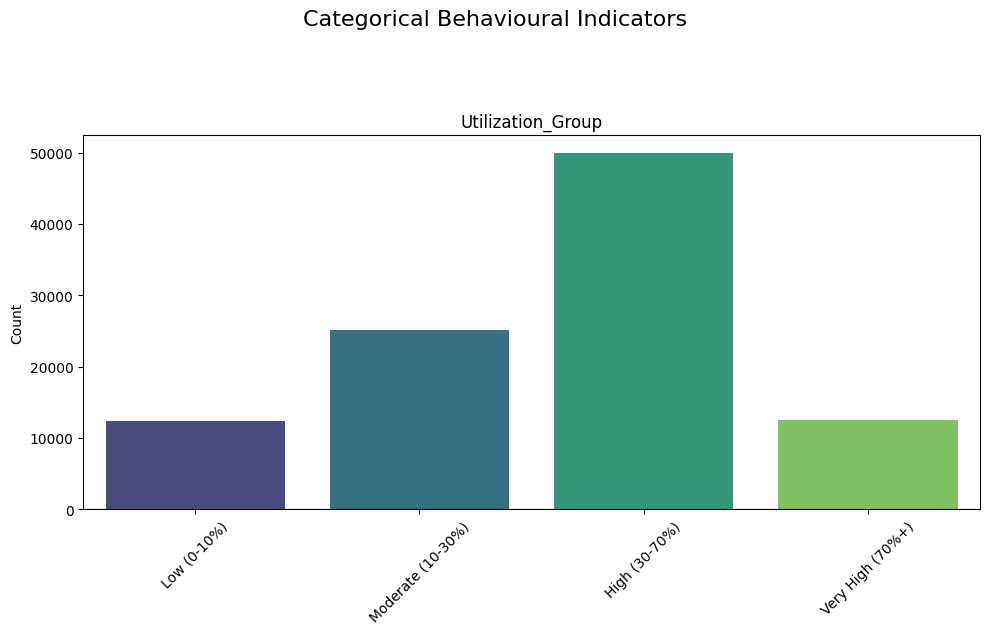

In [18]:
plot_categorical_distributions(removed_missing_values_df, ['Utilization_Group'], "Categorical Behavioural Indicators")

Numerical Columns

In [19]:
# Generate boxplots for numerical columns
def plot_numerical_distributions(df, cols, section_title):
    num_cols = len(cols)

    if num_cols == 0:
        print(f"No columns to plot for {section_title}.")
        return

    if num_cols == 1:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        plt.suptitle(section_title, fontsize=16, y=1.05)
        sns.boxplot(ax=ax, y=cols[0], data=df, palette='viridis', hue=cols[0], legend=False)
        ax.set_title(cols[0])
        ax.set_ylabel('')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        num_cols = len(cols)
        num_rows = (num_cols + 3) // 4  # 4 plots per row (2x2 grid)

        if num_cols == 0:
            print(f"No columns to plot for {section_title}.")
            return

        fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
        axes = axes.flatten()

        plt.suptitle(section_title, fontsize=16, y=1.02)

        # Generate boxplots for each numerical feature
        for i, col in enumerate(cols):
            if i < len(axes):
                sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
                axes[i].set_title(col)
                axes[i].set_ylabel('') # Hide y-axis label as the title is sufficient
                axes[i].set_xlabel(col) # Set x-axis label to the column name

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for the suptitle
        plt.show()

numerical_customer_demographics = ['Dependent_count']
numerical_account_characteristics = ['Months_on_book', 'Total_Relationship_Count', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']
numerical_behavioural_indicators = ['Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

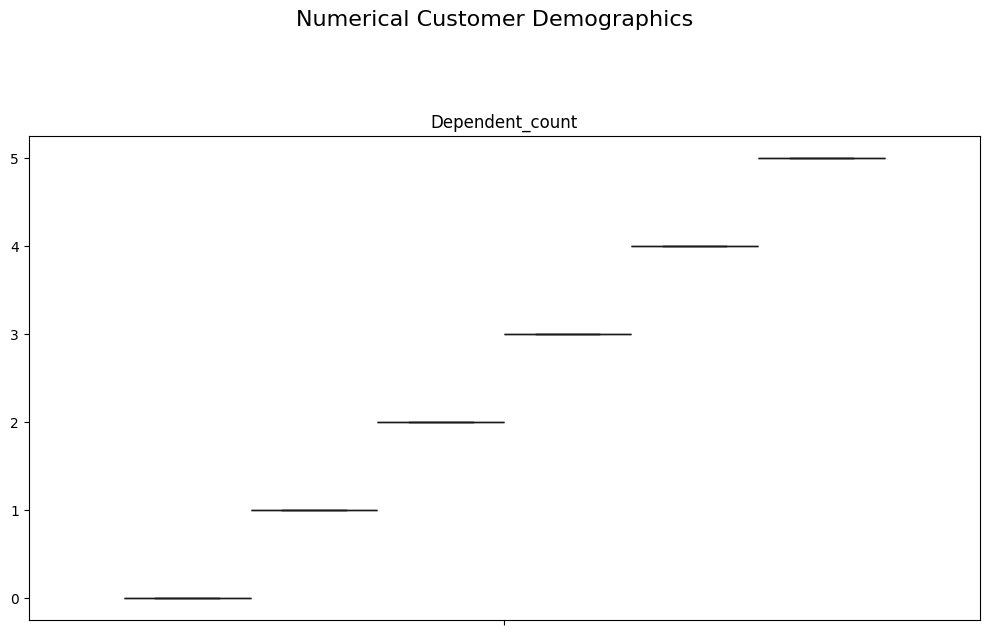

/tmp/ipython-input-2559355453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
/tmp/ipython-input-2559355453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
/tmp/ipython-input-2559355453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
/tmp/ipython-input-2559355453.py:33: FutureWarning: 

P

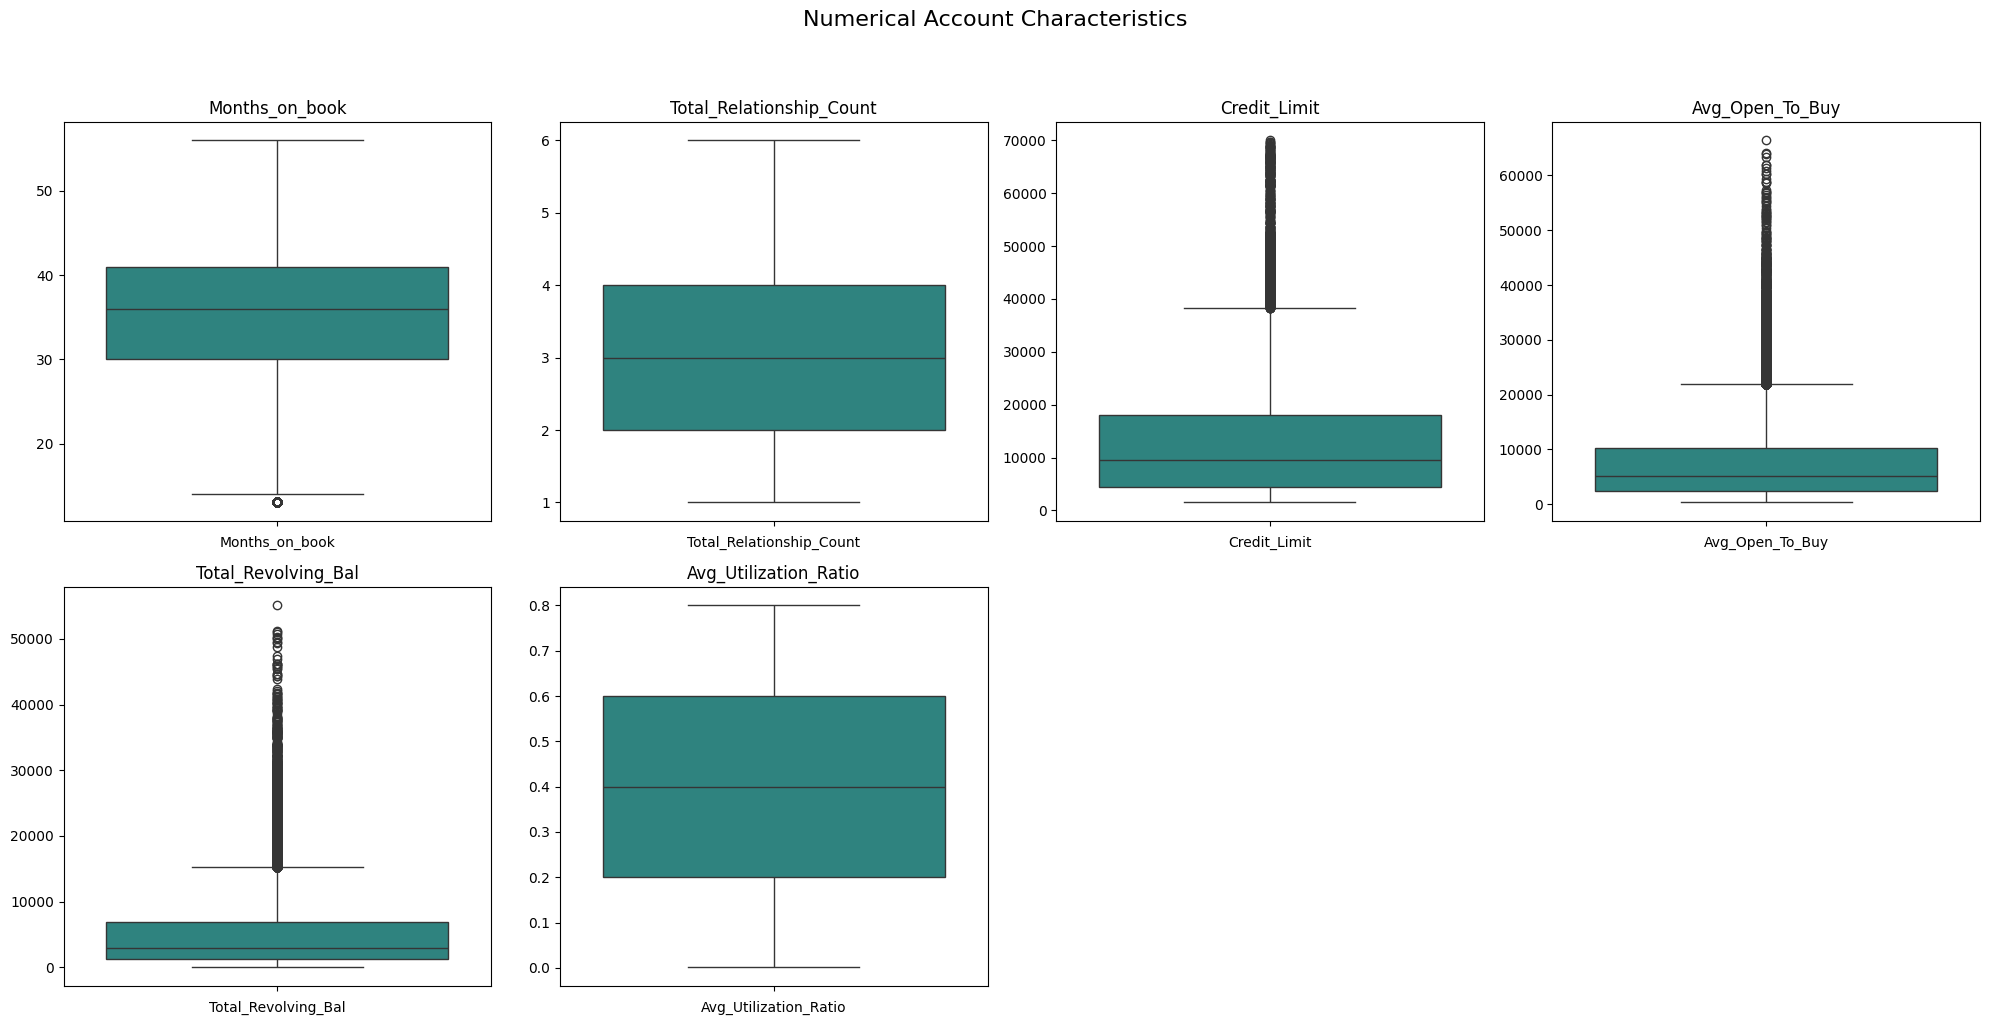

/tmp/ipython-input-2559355453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
/tmp/ipython-input-2559355453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
/tmp/ipython-input-2559355453.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], y=df[col].dropna(), palette='viridis') # Use y for vertical boxplots
/tmp/ipython-input-2559355453.py:33: FutureWarning: 

P

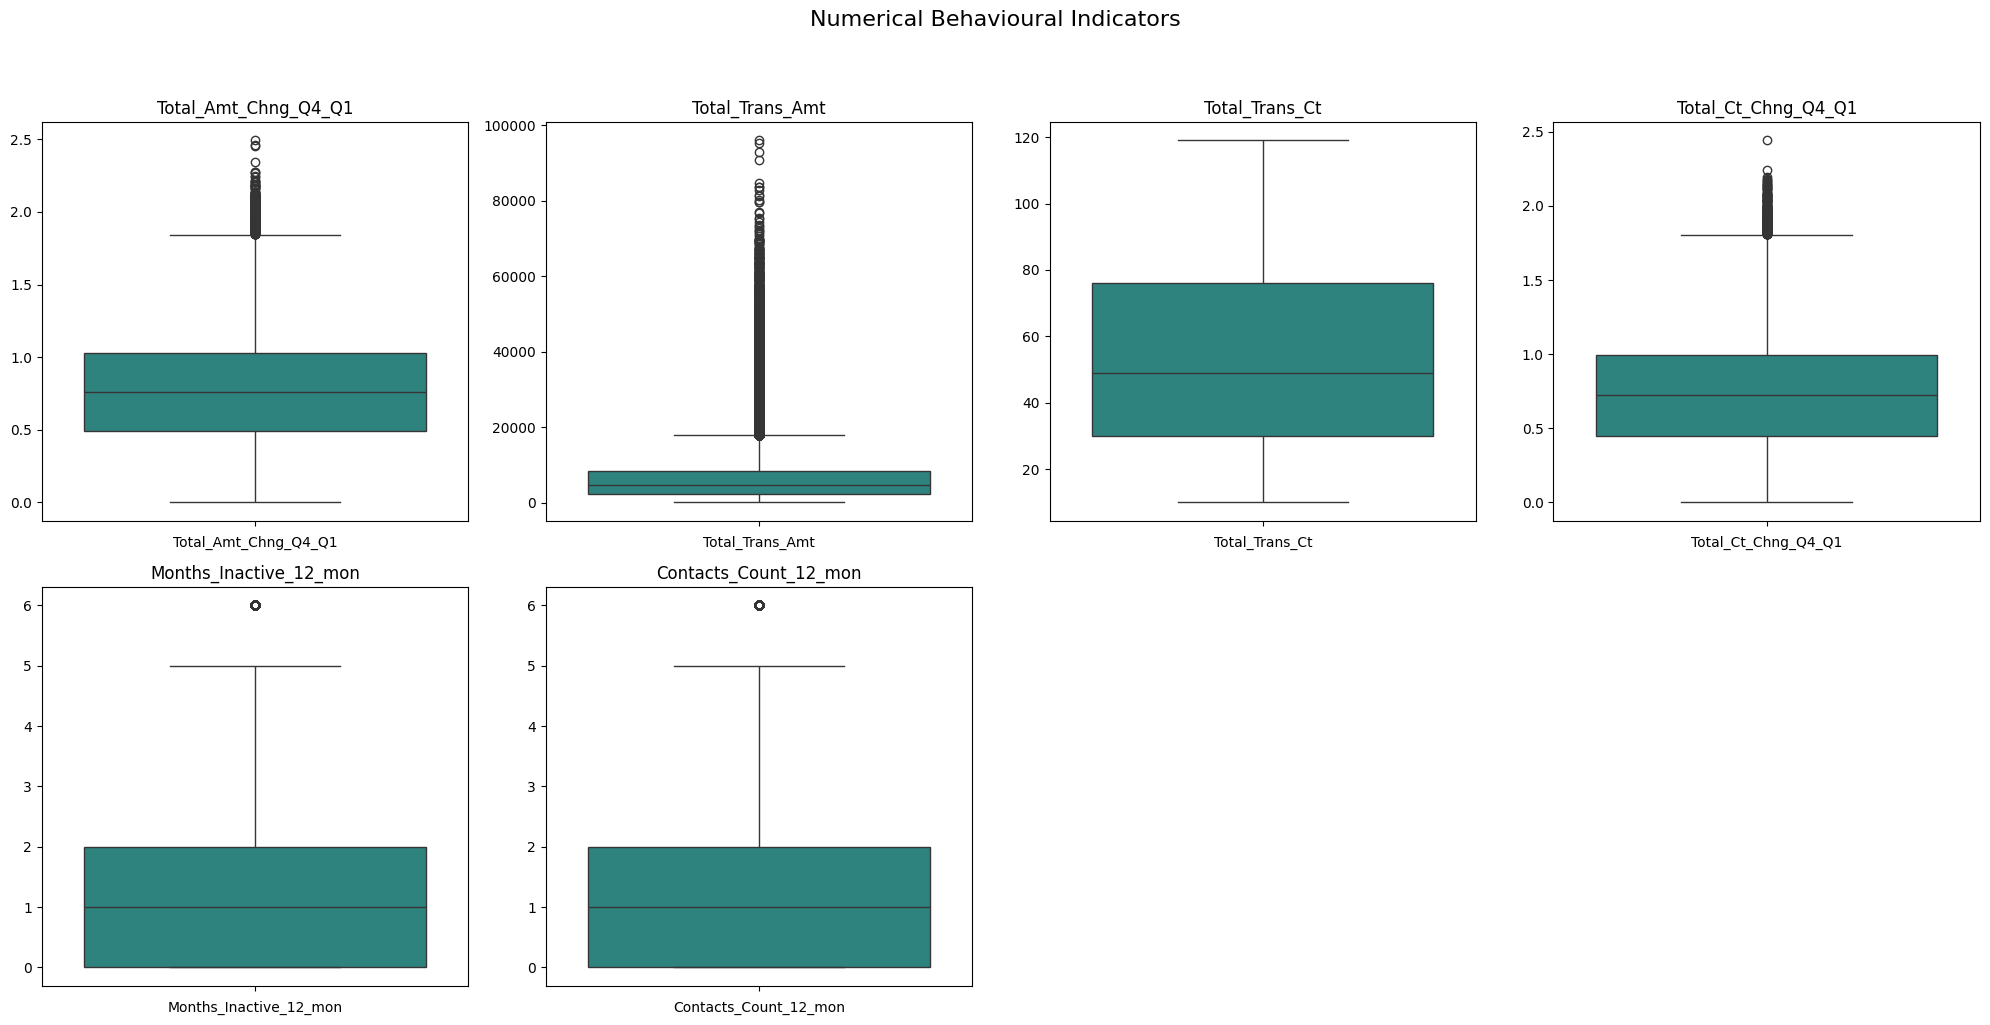

In [20]:
plot_numerical_distributions(removed_missing_values_df, numerical_customer_demographics, "Numerical Customer Demographics")
plot_numerical_distributions(removed_missing_values_df, numerical_account_characteristics, "Numerical Account Characteristics")
plot_numerical_distributions(removed_missing_values_df, numerical_behavioural_indicators, "Numerical Behavioural Indicators")

In [21]:
# Example data quality checks
def assess_data_quality(df):
    """Comprehensive data quality assessment"""

    # Data consistency checks
    consistency_checks = {
        'credit_utilization': (df['Total_Revolving_Bal'] / df['Credit_Limit']).max(),
        'negative_balances': df[df['Total_Revolving_Bal'] < 0].shape[0],
        'impossible_transactions': df[df['Total_Trans_Ct'] < 0].shape[0]
    }

    print("\n" + "="*60)
    print("DATA QUALITY ASSESSMENT")
    print("="*60)

    # Print data consistency checks
    print("\n📊 DATA CONSISTENCY CHECKS:")
    for check, result in consistency_checks.items():
        print(f"{check}: {result:.2%}")

In [22]:
assess_data_quality(removed_missing_values_df)


DATA QUALITY ASSESSMENT

📊 DATA CONSISTENCY CHECKS:
credit_utilization: 80.01%
negative_balances: 0.00%
impossible_transactions: 0.00%


## Churn Rate by Key Segments

In [23]:
# Churn rate by key segments
def analyze_churn_distribution(df):
    """Analyze churn patterns across different segments"""

    segments = ['Card_Category', 'Income_Category', 'Education_Level',
                'Months_Inactive_12_mon', 'Gender', 'Utilization_Group']

    churn_analysis = {}
    for segment in segments:
        churn_rate = df.groupby(segment)['Attrition_Flag'].apply(
            lambda x: (x == 'Attrited Customer').mean()
        ).sort_values(ascending=False)
        churn_analysis[segment] = churn_rate

    print("\n" + "="*60)
    print("CHURN DISTRIBUTION BY SEGMENTS")
    print("="*60)

    for segment, churn_rate in churn_analysis.items():
        print(f"\n📈 CHURN RATE BY {segment.upper()}:")
        for value, rate in churn_rate.items():
            print(f"{value}: {rate:.1%}")

    #Plot pie charts for each result
    for segment, churn_rate in churn_analysis.items():
        plt.figure(figsize=(8, 8))
        plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Churn Rate by {segment}')
        plt.axis('equal')
        plt.show()


CHURN DISTRIBUTION BY SEGMENTS

📈 CHURN RATE BY CARD_CATEGORY:
Blue: 21.1%
Silver: 18.5%
Gold: 15.1%
Platinum: 14.4%

📈 CHURN RATE BY INCOME_CATEGORY:
Unknown: 20.5%
$40K - $60K: 20.5%
$60K - $80K: 20.4%
Less than $40K: 20.3%
$80K - $120K: 20.0%
$120K +: 20.0%

📈 CHURN RATE BY EDUCATION_LEVEL:
Doctorate: 21.6%
Uneducated: 20.8%
College: 20.4%
Graduate: 20.3%
High School: 20.3%
Post-Graduate: 19.7%
Unknown: 19.1%

📈 CHURN RATE BY MONTHS_INACTIVE_12_MON:
6: 41.7%
5: 41.5%
4: 40.7%
3: 40.6%
2: 16.5%
1: 16.3%
0: 10.8%

📈 CHURN RATE BY GENDER:
M: 20.4%
F: 20.2%

📈 CHURN RATE BY UTILIZATION_GROUP:
High (30-70%): 21.3%
Very High (70%+): 21.3%
Low (0-10%): 21.0%
Moderate (10-30%): 17.4%


/tmp/ipython-input-622741866.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(segment)['Attrition_Flag'].apply(


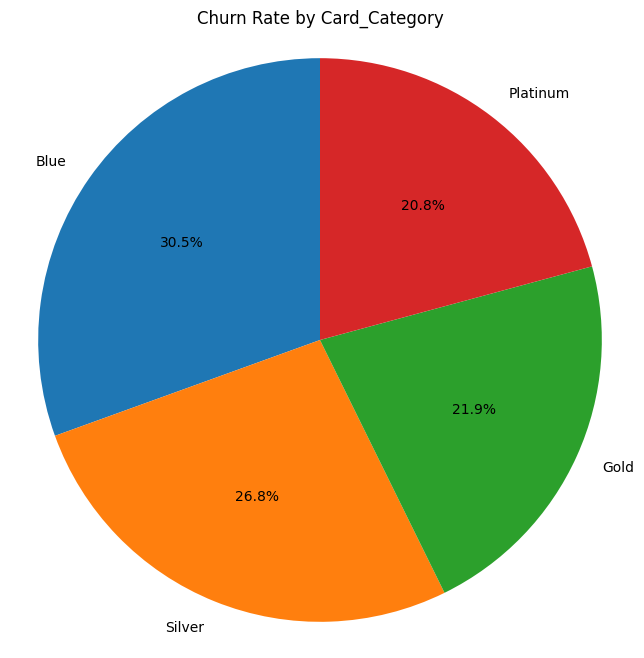

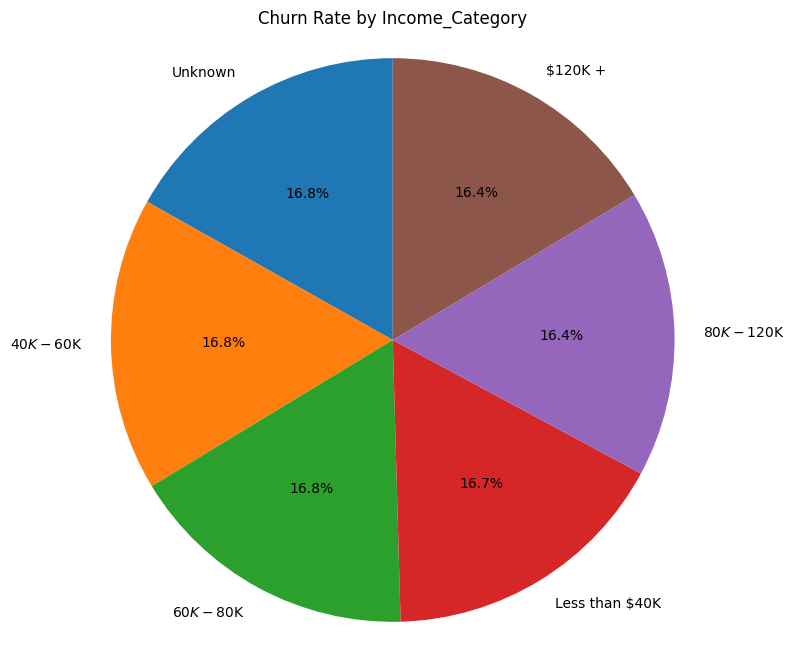

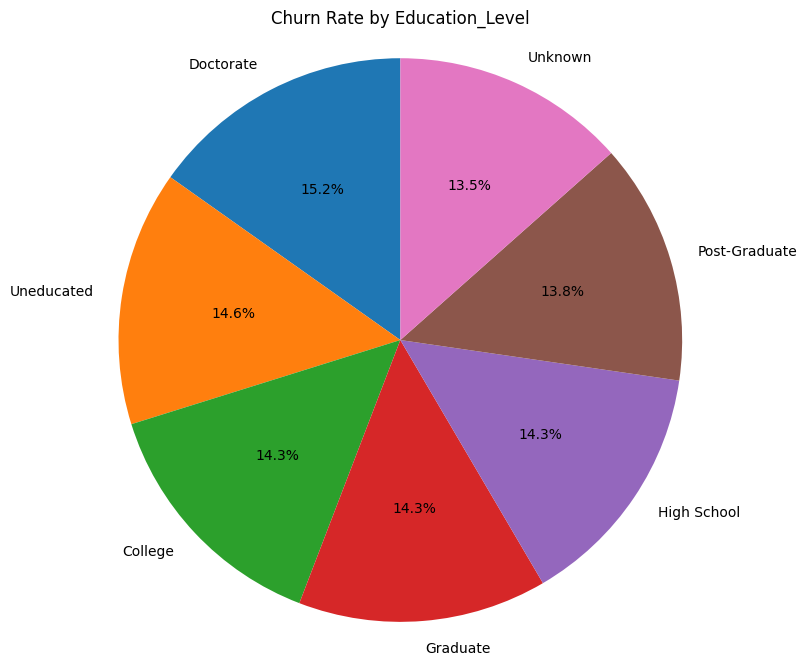

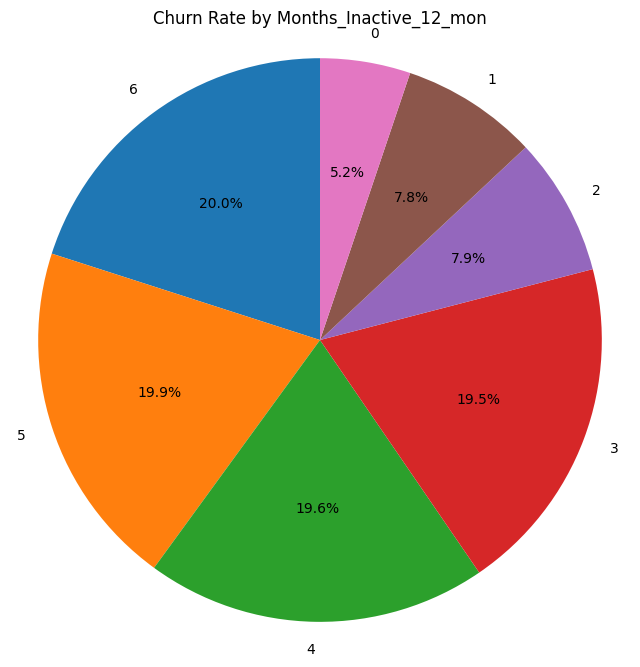

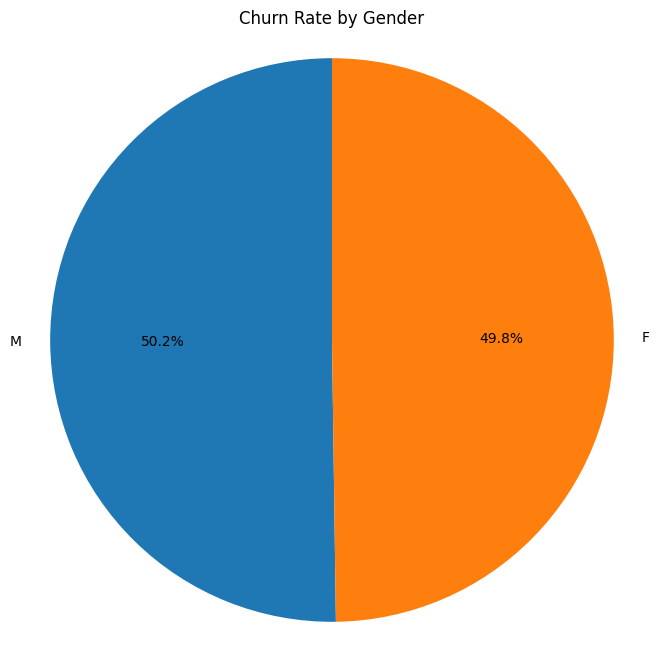

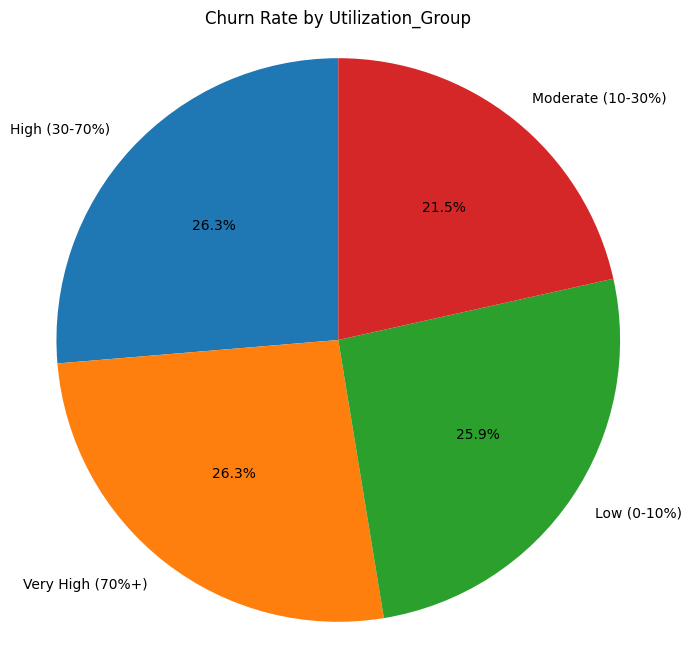

In [24]:
analyze_churn_distribution(removed_missing_values_df)

## Financial Behavior Patterns

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# set plotly offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

class FinancialBehaviorAnalyzer:
    """
    Comprehensive financial behavior analysis for credit card churn prediction
    """

    def __init__(self, df):
        """
        Initialize with credit card customer dataset

        Expected columns:
        - Avg_Utilization_Ratio: Credit utilization ratio
        - Total_Trans_Amt: Total transaction amount
        - Total_Trans_Ct: Total transaction count
        - Total_Relationship_Count: Number of products with bank
        - Total_Amt_Chng_Q4_Q1: Transaction amount change Q4 vs Q1
        - Total_Ct_Chng_Q4_Q1: Transaction count change Q4 vs Q1
        - Attrition_Flag: Churn indicator
        - Credit_Limit: Credit limit
        - Months_on_book: Customer tenure
        """
        self.df = df.copy()
        self.prepare_data()

    def prepare_data(self):
        """Prepare and clean data for analysis"""

        # Convert attrition flag to binary
        if 'Attrition_Flag' in self.df.columns:
            self.df['Churned'] = (self.df['Attrition_Flag'] == 'Attrited Customer').astype(int)

        # Handle missing values
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        self.df[numeric_columns] = self.df[numeric_columns].fillna(self.df[numeric_columns].median())

        print("Data preparation completed.")
        print(f"Dataset shape: {self.df.shape}")
        print(f"Churn rate: {self.df['Churned'].mean():.2%}")

    # ========================================
    # 3.2.1 CREDIT UTILIZATION ANALYSIS
    # ========================================

    def analyze_credit_utilization(self):
        """
        Comprehensive analysis of credit utilization and its impact on churn
        """
        print("\n" + "="*60)
        print("CREDIT UTILIZATION ANALYSIS")
        print("="*60)

        # Create utilization categories
        self.df['Utilization_Category'] = pd.cut(
            self.df['Avg_Utilization_Ratio'],
            bins=[0, 0.1, 0.3, 0.7, 0.9, 1.0],
            labels=['Very Low (0-10%)', 'Low (10-30%)', 'Moderate (30-70%)',
                   'High (70-90%)', 'Very High (90-100%)'],
            include_lowest=True
        )

        # Analysis 1: Churn rate by utilization category
        utilization_churn = self.df.groupby('Utilization_Category').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Credit_Limit': 'mean',
            'Total_Trans_Amt': 'mean'
        }).round(3)

        utilization_churn.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                   'Avg_Credit_Limit', 'Avg_Transaction_Amount']

        print("\n📊 Churn Rate by Credit Utilization Category:")
        print(utilization_churn)

        # Analysis 2: Statistical significance test
        low_util = self.df[self.df['Avg_Utilization_Ratio'] <= 0.3]['Churned']
        high_util = self.df[self.df['Avg_Utilization_Ratio'] > 0.7]['Churned']

        t_stat, p_value = stats.ttest_ind(low_util, high_util)
        print(f"\n📈 Statistical Test (Low vs High Utilization):")
        print(f"Low utilization churn rate: {low_util.mean():.3f}")
        print(f"High utilization churn rate: {high_util.mean():.3f}")
        print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.6f}")

        # Analysis 3: Utilization vs Credit Limit relationship
        correlation = self.df['Avg_Utilization_Ratio'].corr(self.df['Credit_Limit'])
        print(f"\n🔗 Correlation between Utilization and Credit Limit: {correlation:.3f}")

        # Create visualization
        self._plot_utilization_analysis()

        return utilization_churn

    def _plot_utilization_analysis(self):
        """Create visualizations for credit utilization analysis"""

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Credit Utilization Analysis Dashboard', fontsize=16, fontweight='bold')

        # Plot 1: Churn rate by utilization category
        util_summary = self.df.groupby('Utilization_Category').agg({
            'Churned': ['count', 'mean']
        }).reset_index()
        util_summary.columns = ['Utilization_Category', 'Customer_Count', 'Churn_Rate']

        # Bar plot for customer count
        ax1 = axes[0, 0]
        bars = ax1.bar(range(len(util_summary)), util_summary['Customer_Count'],
                      alpha=0.7, color='skyblue', label='Customer Count')
        ax1.set_xlabel('Utilization Category')
        ax1.set_ylabel('Customer Count', color='blue')
        ax1.set_title('Customer Count by Utilization Category')
        ax1.set_xticks(range(len(util_summary)))
        ax1.set_xticklabels(util_summary['Utilization_Category'], rotation=45, ha='right')

        # Line plot for churn rate on secondary y-axis
        ax1_twin = ax1.twinx()
        line = ax1_twin.plot(range(len(util_summary)), util_summary['Churn_Rate'],
                            color='red', marker='o', linewidth=3, label='Churn Rate')
        ax1_twin.set_ylabel('Churn Rate', color='red')
        ax1_twin.tick_params(axis='y', labelcolor='red')

        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=9)

        # Plot 2: Distribution comparison (Churned vs Retained)
        ax2 = axes[0, 1]
        churned_util = self.df[self.df['Churned'] == 1]['Avg_Utilization_Ratio']
        retained_util = self.df[self.df['Churned'] == 0]['Avg_Utilization_Ratio']

        ax2.hist([retained_util, churned_util], bins=30, alpha=0.7,
                label=['Retained', 'Churned'], color=['blue', 'red'])
        ax2.set_xlabel('Utilization Ratio')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Utilization Distribution by Churn Status')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 3: Credit Limit vs Utilization (Scatter)
        ax3 = axes[1, 0]
        colors = ['red' if x == 1 else 'blue' for x in self.df['Churned']]
        scatter = ax3.scatter(self.df['Credit_Limit'], self.df['Avg_Utilization_Ratio'],
                             c=colors, alpha=0.6, s=20)
        ax3.set_xlabel('Credit Limit ($)')
        ax3.set_ylabel('Utilization Ratio')
        ax3.set_title('Credit Limit vs Utilization')
        ax3.grid(True, alpha=0.3)

        # Create custom legend for scatter plot
        from matplotlib.lines import Line2D
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                                 markersize=8, label='Retained'),
                          Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                                 markersize=8, label='Churned')]
        ax3.legend(handles=legend_elements)

        # Plot 4: Transaction Amount vs Utilization (Scatter)
        ax4 = axes[1, 1]
        ax4.scatter(self.df['Total_Trans_Amt'], self.df['Avg_Utilization_Ratio'],
                   c=colors, alpha=0.6, s=20)
        ax4.set_xlabel('Total Transaction Amount ($)')
        ax4.set_ylabel('Utilization Ratio')
        ax4.set_title('Transaction Amount vs Utilization')
        ax4.grid(True, alpha=0.3)
        ax4.legend(handles=legend_elements)

        plt.tight_layout()
        plt.show()

    # ========================================
    # 3.2.2 TRANSACTION VOLUME TRENDS
    # ========================================

    def analyze_transaction_trends(self):
        """
        Analysis of transaction volume trends and their impact on churn
        """
        print("\n" + "="*60)
        print("TRANSACTION VOLUME TRENDS ANALYSIS")
        print("="*60)

        # Analysis 1: Transaction count categories
        self.df['Trans_Count_Category'] = pd.cut(
            self.df['Total_Trans_Ct'],
            bins=[0, 30, 60, 90, float('inf')],
            labels=['Low (0-30)', 'Medium (31-60)', 'High (61-90)', 'Very High (90+)']
        )

        trans_count_analysis = self.df.groupby('Trans_Count_Category').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Trans_Amt': 'mean',
            'Avg_Utilization_Ratio': 'mean'
        }).round(3)

        trans_count_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                      'Avg_Transaction_Amount', 'Avg_Utilization']

        print("\n📊 Churn Rate by Transaction Count Category:")
        print(trans_count_analysis)

        # Analysis 2: Transaction amount categories
        self.df['Trans_Amount_Category'] = pd.qcut(
            self.df['Total_Trans_Amt'],
            q=4,
            labels=['Q1 (Lowest)', 'Q2 (Low-Medium)', 'Q3 (Medium-High)', 'Q4 (Highest)']
        )

        trans_amount_analysis = self.df.groupby('Trans_Amount_Category').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Trans_Ct': 'mean',
            'Credit_Limit': 'mean'
        }).round(3)

        trans_amount_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                       'Avg_Transaction_Count', 'Avg_Credit_Limit']

        print("\n📊 Churn Rate by Transaction Amount Category:")
        print(trans_amount_analysis)

        # Analysis 3: Quarterly change analysis (Q4 vs Q1)
        self.df['Amount_Change_Category'] = pd.cut(
            self.df['Total_Amt_Chng_Q4_Q1'],
            bins=[0, 0.5, 0.8, 1.2, 1.5, float('inf')],
            labels=['Large Decrease', 'Moderate Decrease', 'Stable', 'Moderate Increase', 'Large Increase']
        )

        quarterly_change_analysis = self.df.groupby('Amount_Change_Category').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Ct_Chng_Q4_Q1': 'mean'
        }).round(3)

        quarterly_change_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                           'Avg_Count_Change']

        print("\n📊 Churn Rate by Quarterly Amount Change:")
        print(quarterly_change_analysis)

        # Statistical insights
        declining_customers = self.df[self.df['Total_Amt_Chng_Q4_Q1'] < 0.7]
        stable_customers = self.df[(self.df['Total_Amt_Chng_Q4_Q1'] >= 0.8) &
                                 (self.df['Total_Amt_Chng_Q4_Q1'] <= 1.2)]

        print(f"\n📈 Key Insights:")
        print(f"Declining usage customers (Q4/Q1 < 0.7): {len(declining_customers)} customers, {declining_customers['Churned'].mean():.1%} churn rate")
        print(f"Stable usage customers (0.8 ≤ Q4/Q1 ≤ 1.2): {len(stable_customers)} customers, {stable_customers['Churned'].mean():.1%} churn rate")

        # Create visualization
        self._plot_transaction_trends()

        return trans_count_analysis, trans_amount_analysis, quarterly_change_analysis

    def _plot_transaction_trends(self):
        """Create visualizations for transaction trend analysis"""

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Transaction Volume Trends Analysis', fontsize=16, fontweight='bold')

        # Plot 1: Transaction count vs churn rate
        count_summary = self.df.groupby('Trans_Count_Category').agg({
            'Churned': ['count', 'mean']
        }).reset_index()
        count_summary.columns = ['Trans_Count_Category', 'Customer_Count', 'Churn_Rate']

        ax1 = axes[0, 0]
        bars = ax1.bar(range(len(count_summary)), count_summary['Customer_Count'],
                      alpha=0.7, color='lightcoral', label='Customer Count')
        ax1.set_xlabel('Transaction Count Category')
        ax1.set_ylabel('Customer Count', color='blue')
        ax1.set_title('Customer Count by Transaction Category')
        ax1.set_xticks(range(len(count_summary)))
        ax1.set_xticklabels(count_summary['Trans_Count_Category'], rotation=45, ha='right')

        # Secondary y-axis for churn rate
        ax1_twin = ax1.twinx()
        ax1_twin.plot(range(len(count_summary)), count_summary['Churn_Rate'],
                     color='red', marker='o', linewidth=3, label='Churn Rate')
        ax1_twin.set_ylabel('Churn Rate', color='red')
        ax1_twin.tick_params(axis='y', labelcolor='red')

        # Plot 2: Quarterly change distribution
        ax2 = axes[0, 1]
        churned_change = self.df[self.df['Churned'] == 1]['Total_Amt_Chng_Q4_Q1']
        retained_change = self.df[self.df['Churned'] == 0]['Total_Amt_Chng_Q4_Q1']

        ax2.hist([retained_change, churned_change], bins=30, alpha=0.7,
                label=['Retained', 'Churned'], color=['blue', 'red'])
        ax2.set_xlabel('Q4/Q1 Amount Change Ratio')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Quarterly Change Distribution')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.axvline(x=1.0, color='green', linestyle='--', alpha=0.7, label='No Change')

        # Plot 3: Transaction amount vs count scatter
        ax3 = axes[1, 0]
        colors = ['red' if x == 1 else 'blue' for x in self.df['Churned']]
        ax3.scatter(self.df['Total_Trans_Amt'], self.df['Total_Trans_Ct'],
                   c=colors, alpha=0.6, s=20)
        ax3.set_xlabel('Total Transaction Amount ($)')
        ax3.set_ylabel('Total Transaction Count')
        ax3.set_title('Transaction Amount vs Count')
        ax3.grid(True, alpha=0.3)

        # Create legend
        from matplotlib.lines import Line2D
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                                 markersize=8, label='Retained'),
                          Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                                 markersize=8, label='Churned')]
        ax3.legend(handles=legend_elements)

        # Plot 4: Usage change patterns
        ax4 = axes[1, 1]
        change_summary = self.df.groupby('Amount_Change_Category')['Churned'].mean().reset_index()

        bars = ax4.bar(range(len(change_summary)), change_summary['Churned'],
                      color='orange', alpha=0.7)
        ax4.set_xlabel('Amount Change Category')
        ax4.set_ylabel('Churn Rate')
        ax4.set_title('Churn Rate by Usage Change Pattern')
        ax4.set_xticks(range(len(change_summary)))
        ax4.set_xticklabels(change_summary['Amount_Change_Category'], rotation=45, ha='right')
        ax4.grid(True, alpha=0.3)

        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.1%}', ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

    # ========================================
    # 3.2.3 PAYMENT BEHAVIOR ANALYSIS
    # ========================================

    def analyze_payment_behavior(self):
        """
        Analysis of payment behavior patterns and churn correlation
        Note: This uses proxy indicators from available data
        """
        print("\n" + "="*60)
        print("PAYMENT BEHAVIOR ANALYSIS")
        print("="*60)

        # Create payment behavior indicators from available data
        # High revolving balance relative to credit limit suggests payment issues
        self.df['Payment_Stress_Indicator'] = (
            self.df['Total_Revolving_Bal'] / self.df['Credit_Limit']
        ).fillna(0)

        # Low transaction amount relative to credit limit suggests underutilization
        self.df['Underutilization_Indicator'] = (
            self.df['Total_Trans_Amt'] / (self.df['Credit_Limit'] * 12)
        ).fillna(0)

        # High utilization with low transaction count suggests balance carrying
        self.df['Balance_Carrying_Indicator'] = np.where(
            (self.df['Avg_Utilization_Ratio'] > 0.5) & (self.df['Total_Trans_Ct'] < 50),
            1, 0
        )

        # Analysis 1: Payment stress levels
        self.df['Payment_Stress_Level'] = pd.cut(
            self.df['Payment_Stress_Indicator'],
            bins=[0, 0.1, 0.5, 0.8, 1.0],
            labels=['Low Stress', 'Moderate Stress', 'High Stress', 'Very High Stress']
        )

        payment_stress_analysis = self.df.groupby('Payment_Stress_Level').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Avg_Utilization_Ratio': 'mean',
            'Total_Trans_Ct': 'mean'
        }).round(3)

        payment_stress_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                         'Avg_Utilization', 'Avg_Trans_Count']

        print("\n📊 Churn Rate by Payment Stress Level:")
        print(payment_stress_analysis)

        # Analysis 2: Balance carrying behavior
        balance_carrying_analysis = self.df.groupby('Balance_Carrying_Indicator').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Avg_Utilization_Ratio': 'mean',
            'Total_Revolving_Bal': 'mean'
        }).round(3)

        balance_carrying_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                           'Avg_Utilization', 'Avg_Revolving_Balance']
        balance_carrying_analysis.index = ['Non-Balance Carriers', 'Balance Carriers']

        print("\n📊 Balance Carrying Behavior Analysis:")
        print(balance_carrying_analysis)

        # Analysis 3: Underutilization patterns
        self.df['Underutilization_Level'] = pd.cut(
            self.df['Underutilization_Indicator'],
            bins=[0, 0.01, 0.05, 0.15, float('inf')],
            labels=['Severe Underuse', 'Moderate Underuse', 'Normal Use', 'High Use']
        )

        underutilization_analysis = self.df.groupby('Underutilization_Level').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Credit_Limit': 'mean',
            'Total_Trans_Amt': 'mean'
        }).round(3)

        underutilization_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                           'Avg_Credit_Limit', 'Avg_Trans_Amount']

        print("\n📊 Churn Rate by Card Utilization Level:")
        print(underutilization_analysis)

        # Key insights
        print(f"\n📈 Payment Behavior Insights:")
        print(f"High payment stress customers: {(self.df['Payment_Stress_Level'] == 'Very High Stress').sum()} customers")
        print(f"Balance carriers churn rate: {self.df[self.df['Balance_Carrying_Indicator']==1]['Churned'].mean():.1%}")
        print(f"Severe underutilizers churn rate: {self.df[self.df['Underutilization_Level']=='Severe Underuse']['Churned'].mean():.1%}")

        # Create visualization
        self._plot_payment_behavior_analysis()

    def _plot_payment_behavior_analysis(self):
        """Create visualizations for payment behavior analysis"""

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Payment Behavior Analysis', fontsize=16, fontweight='bold')

        # Plot 1: Payment stress levels
        ax1 = axes[0, 0]
        stress_summary = self.df.groupby('Payment_Stress_Level')['Churned'].agg(['count', 'mean']).reset_index()
        stress_summary.columns = ['Payment_Stress_Level', 'Customer_Count', 'Churn_Rate']

        bars = ax1.bar(range(len(stress_summary)), stress_summary['Customer_Count'],
                      alpha=0.7, color='salmon')
        ax1.set_xlabel('Payment Stress Level')
        ax1.set_ylabel('Customer Count', color='blue')
        ax1.set_title('Customer Count by Payment Stress Level')
        ax1.set_xticks(range(len(stress_summary)))
        ax1.set_xticklabels(stress_summary['Payment_Stress_Level'], rotation=45, ha='right')

        # Secondary y-axis
        ax1_twin = ax1.twinx()
        ax1_twin.plot(range(len(stress_summary)), stress_summary['Churn_Rate'],
                     color='red', marker='o', linewidth=3)
        ax1_twin.set_ylabel('Churn Rate', color='red')
        ax1_twin.tick_params(axis='y', labelcolor='red')

        # Plot 2: Balance carrying behavior
        ax2 = axes[0, 1]
        balance_summary = self.df.groupby('Balance_Carrying_Indicator')['Churned'].mean()
        balance_labels = ['Non-Balance Carriers', 'Balance Carriers']

        bars = ax2.bar(balance_labels, balance_summary.values,
                      color=['lightblue', 'orange'], alpha=0.7)
        ax2.set_ylabel('Churn Rate')
        ax2.set_title('Churn Rate: Balance Carriers vs Non-Balance Carriers')
        ax2.grid(True, alpha=0.3)

        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.1%}', ha='center', va='bottom', fontsize=10)

        # Plot 3: Underutilization patterns
        ax3 = axes[1, 0]
        underutil_summary = self.df.groupby('Underutilization_Level')['Churned'].mean().reset_index()

        bars = ax3.bar(range(len(underutil_summary)), underutil_summary['Churned'],
                      color='gold', alpha=0.7)
        ax3.set_xlabel('Utilization Level')
        ax3.set_ylabel('Churn Rate')
        ax3.set_title('Churn Rate by Card Utilization Level')
        ax3.set_xticks(range(len(underutil_summary)))
        ax3.set_xticklabels(underutil_summary['Underutilization_Level'], rotation=45, ha='right')
        ax3.grid(True, alpha=0.3)

        # Plot 4: Payment stress vs utilization heatmap
        ax4 = axes[1, 1]

        # Create a pivot table for heatmap
        pivot_data = self.df.pivot_table(
            values='Churned',
            index='Payment_Stress_Level',
            columns='Balance_Carrying_Indicator',
            aggfunc='mean'
        )

        sns.heatmap(pivot_data, annot=True, fmt='.2%', cmap='Reds', ax=ax4)
        ax4.set_title('Churn Rate Heatmap: Payment Stress vs Balance Carrying')
        ax4.set_xlabel('Balance Carrying (0=No, 1=Yes)')
        ax4.set_ylabel('Payment Stress Level')

        plt.tight_layout()
        plt.show()

    # ========================================
    # 3.2.4 PRODUCT RELATIONSHIP DEPTH
    # ========================================

    def analyze_relationship_depth(self):
        """
        Analysis of product relationship depth and its impact on churn
        """
        print("\n" + "="*60)
        print("PRODUCT RELATIONSHIP DEPTH ANALYSIS")
        print("="*60)

        # Analysis 1: Churn by number of products
        relationship_analysis = self.df.groupby('Total_Relationship_Count').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Trans_Amt': 'mean',
            'Credit_Limit': 'mean',
            'Months_on_book': 'mean'
        }).round(3)

        relationship_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                       'Avg_Trans_Amount', 'Avg_Credit_Limit', 'Avg_Tenure']

        print("\n📊 Churn Rate by Number of Products:")
        print(relationship_analysis)

        # Analysis 2: Single vs Multi-product customers
        self.df['Product_Category'] = np.where(
            self.df['Total_Relationship_Count'] == 1, 'Single Product', 'Multi Product'
        )

        product_category_analysis = self.df.groupby('Product_Category').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Trans_Amt': 'mean',
            'Avg_Utilization_Ratio': 'mean',
            'Months_on_book': 'mean'
        }).round(3)

        product_category_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                           'Avg_Trans_Amount', 'Avg_Utilization', 'Avg_Tenure']

        print("\n📊 Single vs Multi-Product Customer Analysis:")
        print(product_category_analysis)

        # Analysis 3: Relationship depth categories
        self.df['Relationship_Depth'] = pd.cut(
            self.df['Total_Relationship_Count'],
            bins=[0, 1, 2, 3, float('inf')],
            labels=['Single (1)', 'Dual (2)', 'Triple (3)', 'Deep (4+)']
        )

        depth_analysis = self.df.groupby('Relationship_Depth').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Trans_Amt': 'mean',
            'Credit_Limit': 'mean'
        }).round(3)

        depth_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                                'Avg_Trans_Amount', 'Avg_Credit_Limit']

        print("\n📊 Churn Rate by Relationship Depth:")
        print(depth_analysis)

        # Statistical analysis
        single_product_churn = self.df[self.df['Total_Relationship_Count'] == 1]['Churned'].mean()
        multi_product_churn = self.df[self.df['Total_Relationship_Count'] > 1]['Churned'].mean()

        # Chi-square test for independence
        contingency_table = pd.crosstab(self.df['Product_Category'], self.df['Churned'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        print(f"\n📈 Relationship Depth Insights:")
        print(f"Single product customers: {single_product_churn:.1%} churn rate")
        print(f"Multi-product customers: {multi_product_churn:.1%} churn rate")
        print(f"Churn rate difference: {(single_product_churn - multi_product_churn)*100:.1f} percentage points")
        print(f"Chi-square test p-value: {p_value:.6f}")

        # Create visualization
        self._plot_relationship_analysis()

        return relationship_analysis, product_category_analysis, depth_analysis

    def _plot_relationship_analysis(self):
        """Create visualizations for relationship depth analysis"""

        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Churn Rate by Number of Products',
                          'Single vs Multi-Product Distribution',
                          'Relationship Depth Analysis',
                          'Product Count vs Transaction Volume'),
            specs=[[{"secondary_y": True}, {"type": "pie"}],
                   [{"type": "bar"}, {"type": "scatter"}]]
        )

        # Plot 1: Churn rate by product count
        product_summary = self.df.groupby('Total_Relationship_Count').agg({
            'Churned': ['count', 'mean']
        }).reset_index()
        product_summary.columns = ['Product_Count', 'Customer_Count', 'Churn_Rate']

        fig.add_trace(
            go.Bar(x=product_summary['Product_Count'], y=product_summary['Customer_Count'],
                  name='Customer Count'),
            row=1, col=1
        )

        fig.add_trace(
            go.Scatter(x=product_summary['Product_Count'], y=product_summary['Churn_Rate'],
                      mode='lines+markers', name='Churn Rate', yaxis='y2',
                      line=dict(color='red', width=3)),
            row=1, col=1, secondary_y=True
        )

        # Plot 2: Single vs Multi-product pie chart
        category_counts = self.df['Product_Category'].value_counts()
        fig.add_trace(
            go.Pie(labels=category_counts.index, values=category_counts.values,
                  name="Product Category Distribution"),
            row=1, col=2
        )

        # Plot 3: Relationship depth churn rates
        depth_summary = self.df.groupby('Relationship_Depth')['Churned'].mean().reset_index()
        fig.add_trace(
            go.Bar(x=depth_summary['Relationship_Depth'], y=depth_summary['Churned'],
                  name='Churn Rate by Depth'),
            row=2, col=1
        )

        # Plot 4: Product count vs transaction volume
        colors = ['red' if x == 1 else 'blue' for x in self.df['Churned']]
        fig.add_trace(
            go.Scatter(x=self.df['Total_Relationship_Count'], y=self.df['Total_Trans_Amt'],
                      mode='markers', marker=dict(color=colors, opacity=0.6),
                      name='Products vs Transactions'),
            row=2, col=2
        )

        fig.update_layout(height=800, title_text="Product Relationship Depth Analysis")
        fig.show()

    # ========================================
    # COMPREHENSIVE ANALYSIS SUMMARY
    # ========================================

    def comprehensive_financial_analysis(self):
        """
        Run all financial behavior analyses and provide comprehensive summary
        """
        print("\n🔍 COMPREHENSIVE FINANCIAL BEHAVIOR ANALYSIS")
        print("="*80)

        # Run all analyses
        util_results = self.analyze_credit_utilization()
        trans_results = self.analyze_transaction_trends()
        payment_results = self.analyze_payment_behavior()
        relationship_results = self.analyze_relationship_depth()

        # Generate summary insights
        print("\n📋 EXECUTIVE SUMMARY OF FINANCIAL BEHAVIOR PATTERNS")
        print("="*60)

        # Key findings
        high_util_churn = self.df[self.df['Avg_Utilization_Ratio'] > 0.7]['Churned'].mean()
        low_trans_churn = self.df[self.df['Total_Trans_Ct'] < 30]['Churned'].mean()
        single_product_churn = self.df[self.df['Total_Relationship_Count'] == 1]['Churned'].mean()
        declining_usage_churn = self.df[self.df['Total_Amt_Chng_Q4_Q1'] < 0.7]['Churned'].mean()

        print(f"\n🎯 HIGH-RISK CUSTOMER PROFILES:")
        print(f"• High utilization (>70%): {high_util_churn:.1%} churn rate")
        print(f"• Low transaction activity (<30 trans): {low_trans_churn:.1%} churn rate")
        print(f"• Single product relationship: {single_product_churn:.1%} churn rate")
        print(f"• Declining usage pattern: {declining_usage_churn:.1%} churn rate")

        # Risk scoring
        self.create_financial_risk_score()

        return {
            'utilization_analysis': util_results,
            'transaction_analysis': trans_results,
            'payment_analysis': payment_results,
            'relationship_analysis': relationship_results
        }

    def create_financial_risk_score(self):
        """
        Create a comprehensive financial risk score based on all analyses
        """
        print(f"\n📊 FINANCIAL RISK SCORING MODEL")
        print("-" * 40)

        # Initialize risk score
        self.df['Financial_Risk_Score'] = 0

        # Utilization risk (25% weight)
        self.df['Financial_Risk_Score'] += np.where(self.df['Avg_Utilization_Ratio'] > 0.8, 25,
                                                  np.where(self.df['Avg_Utilization_Ratio'] > 0.5, 15,
                                                          np.where(self.df['Avg_Utilization_Ratio'] < 0.1, 20, 5)))

        # Transaction volume risk (25% weight)
        self.df['Financial_Risk_Score'] += np.where(self.df['Total_Trans_Ct'] < 30, 25,
                                                  np.where(self.df['Total_Trans_Ct'] < 60, 15, 5))

        # Usage trend risk (25% weight)
        self.df['Financial_Risk_Score'] += np.where(self.df['Total_Amt_Chng_Q4_Q1'] < 0.7, 25,
                                                  np.where(self.df['Total_Amt_Chng_Q4_Q1'] < 0.9, 15, 5))

        # Relationship depth risk (25% weight)
        self.df['Financial_Risk_Score'] += np.where(self.df['Total_Relationship_Count'] == 1, 25,
                                                  np.where(self.df['Total_Relationship_Count'] == 2, 15, 5))

        # Create risk categories
        self.df['Risk_Category'] = pd.cut(
            self.df['Financial_Risk_Score'],
            bins=[0, 30, 50, 70, 100],
            labels=['Low Risk', 'Medium Risk', 'High Risk', 'Critical Risk']
        )

        # Analyze risk score effectiveness
        risk_analysis = self.df.groupby('Risk_Category').agg({
            'Churned': ['count', 'sum', 'mean'],
            'Total_Trans_Amt': 'mean',
            'Credit_Limit': 'mean'
        }).round(3)

        risk_analysis.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate',
                               'Avg_Trans_Amount', 'Avg_Credit_Limit']

        print("\n📈 Financial Risk Score Validation:")
        print(risk_analysis)

        # Calculate risk score performance
        high_risk_customers = self.df[self.df['Risk_Category'].isin(['High Risk', 'Critical Risk'])]
        precision = high_risk_customers['Churned'].mean()
        recall = high_risk_customers['Churned'].sum() / self.df['Churned'].sum()

        print(f"\n🎯 Risk Model Performance:")
        print(f"Precision (% of high-risk who actually churn): {precision:.1%}")
        print(f"Recall (% of churners identified as high-risk): {recall:.1%}")
        print(f"High-risk customers identified: {len(high_risk_customers)} ({len(high_risk_customers)/len(self.df):.1%} of total)")

        # Create visualization for risk score analysis
        self._plot_risk_score_analysis()

    def _plot_risk_score_analysis(self):
        """Create visualizations for financial risk score analysis"""

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Financial Risk Score Analysis', fontsize=16, fontweight='bold')

        # Plot 1: Risk score distribution
        ax1 = axes[0, 0]
        ax1.hist(self.df['Financial_Risk_Score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.set_xlabel('Financial Risk Score')
        ax1.set_ylabel('Number of Customers')
        ax1.set_title('Distribution of Financial Risk Scores')
        ax1.grid(True, alpha=0.3)
        ax1.axvline(self.df['Financial_Risk_Score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {self.df["Financial_Risk_Score"].mean():.1f}')
        ax1.legend()

        # Plot 2: Churn rate by risk category
        ax2 = axes[0, 1]
        risk_summary = self.df.groupby('Risk_Category')['Churned'].agg(['count', 'mean']).reset_index()
        risk_summary.columns = ['Risk_Category', 'Customer_Count', 'Churn_Rate']

        bars = ax2.bar(range(len(risk_summary)), risk_summary['Churn_Rate'],
                      color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
        ax2.set_xlabel('Risk Category')
        ax2.set_ylabel('Churn Rate')
        ax2.set_title('Churn Rate by Risk Category')
        ax2.set_xticks(range(len(risk_summary)))
        ax2.set_xticklabels(risk_summary['Risk_Category'], rotation=45, ha='right', fontsize=8)
        ax2.grid(True, alpha=0.3)

        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.1%}', ha='center', va='bottom', fontsize=10)

        # Plot 3: Risk score components heatmap
        ax3 = axes[1, 0]

        # Create risk component analysis
        risk_components = pd.DataFrame({
            'High_Utilization': (self.df['Avg_Utilization_Ratio'] > 0.8).astype(int),
            'Low_Transactions': (self.df['Total_Trans_Ct'] < 30).astype(int),
            'Declining_Usage': (self.df['Total_Amt_Chng_Q4_Q1'] < 0.7).astype(int),
            'Single_Product': (self.df['Total_Relationship_Count'] == 1).astype(int),
            'Churned': self.df['Churned']
        })

        correlation_matrix = risk_components.corr()
        sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r',
                   center=0, ax=ax3)
        ax3.set_title('Risk Factor Correlation Matrix')

        # Plot 4: ROC-style analysis for risk model
        ax4 = axes[1, 1]

        # Calculate precision and recall for different risk thresholds
        thresholds = range(20, 100, 10)
        precisions = []
        recalls = []

        for threshold in thresholds:
            high_risk = self.df['Financial_Risk_Score'] >= threshold
            if high_risk.sum() > 0:
                precision = self.df[high_risk]['Churned'].mean()
                recall = self.df[high_risk]['Churned'].sum() / self.df['Churned'].sum()
                precisions.append(precision)
                recalls.append(recall)
            else:
                precisions.append(0)
                recalls.append(0)

        ax4.plot(recalls, precisions, marker='o', linewidth=2, markersize=6)
        ax4.set_xlabel('Recall (% of churners identified)')
        ax4.set_ylabel('Precision (% of high-risk who churn)')
        ax4.set_title('Risk Model Performance: Precision vs Recall')
        ax4.grid(True, alpha=0.3)

        # Add threshold labels
        for i, threshold in enumerate(thresholds):
            if i % 2 == 0:  # Show every other label to avoid clutter
                ax4.annotate(f'{threshold}', (recalls[i], precisions[i]),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)

        plt.tight_layout()
        plt.show()

    def create_comprehensive_dashboard(self):
        """
        Create a comprehensive dashboard with all key financial behavior metrics
        """

        fig, axes = plt.subplots(3, 3, figsize=(20, 16))
        fig.suptitle('Comprehensive Financial Behavior Analysis Dashboard',
                    fontsize=18, fontweight='bold')

        # 1. Churn rate by utilization
        ax1 = axes[0, 0]
        util_churn = self.df.groupby('Utilization_Category')['Churned'].mean()
        bars = ax1.bar(range(len(util_churn)), util_churn.values,
                      color='lightblue', alpha=0.7)
        ax1.set_title('Churn Rate by Utilization Category')
        ax1.set_ylabel('Churn Rate')
        ax1.set_xticks(range(len(util_churn)))
        ax1.set_xticklabels(util_churn.index, rotation=45, ha='right', fontsize=8)

        # 2. Transaction count distribution
        ax2 = axes[0, 1]
        churned_trans = self.df[self.df['Churned'] == 1]['Total_Trans_Ct']
        retained_trans = self.df[self.df['Churned'] == 0]['Total_Trans_Ct']
        ax2.hist([retained_trans, churned_trans], bins=20, alpha=0.7,
                label=['Retained', 'Churned'], color=['blue', 'red'])
        ax2.set_title('Transaction Count Distribution')
        ax2.set_xlabel('Transaction Count')
        ax2.set_ylabel('Frequency')
        ax2.legend()

        # 3. Quarterly change impact
        ax3 = axes[0, 2]
        change_churn = self.df.groupby('Amount_Change_Category')['Churned'].mean()
        bars = ax3.bar(range(len(change_churn)), change_churn.values,
                      color='orange', alpha=0.7)
        ax3.set_title('Churn Rate by Usage Change')
        ax3.set_ylabel('Churn Rate')
        ax3.set_xticks(range(len(change_churn)))
        ax3.set_xticklabels(change_churn.index, rotation=45, ha='right', fontsize=8)

        # 4. Relationship depth impact
        ax4 = axes[1, 0]
        product_churn = self.df.groupby('Total_Relationship_Count')['Churned'].mean()
        ax4.plot(product_churn.index, product_churn.values, marker='o', linewidth=2)
        ax4.set_title('Churn Rate by Number of Products')
        ax4.set_xlabel('Number of Products')
        ax4.set_ylabel('Churn Rate')
        ax4.grid(True, alpha=0.3)

        # 5. Payment stress levels
        ax5 = axes[1, 1]
        stress_churn = self.df.groupby('Payment_Stress_Level')['Churned'].mean()
        bars = ax5.bar(range(len(stress_churn)), stress_churn.values,
                      color='salmon', alpha=0.7)
        ax5.set_title('Churn Rate by Payment Stress')
        ax5.set_ylabel('Churn Rate')
        ax5.set_xticks(range(len(stress_churn)))
        ax5.set_xticklabels(stress_churn.index, rotation=45, ha='right', fontsize=8)

        # 6. Credit utilization vs transactions scatter
        ax6 = axes[1, 2]
        colors = ['red' if x == 1 else 'blue' for x in self.df['Churned']]
        scatter = ax6.scatter(self.df['Avg_Utilization_Ratio'], self.df['Total_Trans_Ct'],
                             c=colors, alpha=0.5, s=10)
        ax6.set_title('Utilization vs Transaction Count')
        ax6.set_xlabel('Utilization Ratio')
        ax6.set_ylabel('Transaction Count')

        # 7. Risk score distribution
        ax7 = axes[2, 0]
        risk_dist = self.df.groupby('Risk_Category')['Churned'].agg(['count', 'mean'])
        bars = ax7.bar(range(len(risk_dist)), risk_dist['count'],
                      color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
        ax7.set_title('Customer Count by Risk Category')
        ax7.set_ylabel('Customer Count')
        ax7.set_xticks(range(len(risk_dist)))
        ax7.set_xticklabels(risk_dist.index, rotation=45, ha='right', fontsize=8)

        # 8. Key metrics summary (text box)
        ax8 = axes[2, 1]
        ax8.axis('off')

        # Calculate key metrics
        total_customers = len(self.df)
        total_churned = self.df['Churned'].sum()
        churn_rate = self.df['Churned'].mean()
        high_risk_count = len(self.df[self.df['Risk_Category'].isin(['High Risk', 'Critical Risk'])])

        metrics_text = f"""
        KEY METRICS SUMMARY

        Total Customers: {total_customers:,}
        Churned Customers: {total_churned:,}
        Overall Churn Rate: {churn_rate:.1%}

        High-Risk Customers: {high_risk_count:,}
        Risk Coverage: {high_risk_count/total_customers:.1%}

        Top Risk Factors:
        • High Utilization (>80%)
        • Low Transactions (<30)
        • Declining Usage
        • Single Product
        """

        ax8.text(0.1, 0.9, metrics_text, transform=ax8.transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

        # 9. Feature importance visualization
        ax9 = axes[2, 2]

        # Calculate feature importance based on correlation with churn
        feature_importance = {
            'Utilization Ratio': abs(self.df['Avg_Utilization_Ratio'].corr(self.df['Churned'])),
            'Transaction Count': abs(self.df['Total_Trans_Ct'].corr(self.df['Churned'])),
            'Usage Change': abs(self.df['Total_Amt_Chng_Q4_Q1'].corr(self.df['Churned'])),
            'Product Count': abs(self.df['Total_Relationship_Count'].corr(self.df['Churned'])),
            'Credit Limit': abs(self.df['Credit_Limit'].corr(self.df['Churned']))
        }

        features = list(feature_importance.keys())
        importance_values = list(feature_importance.values())

        bars = ax9.barh(features, importance_values, color='purple', alpha=0.7)
        ax9.set_title('Feature Importance (Correlation with Churn)')
        ax9.set_xlabel('Absolute Correlation')

        plt.tight_layout()
        plt.show()

# ========================================
# USAGE EXAMPLE AND MAIN EXECUTION
# ========================================

def main_analysis_example():
    """
    Example of how to use the FinancialBehaviorAnalyzer
    """

    # Load your credit card dataset
    # df = pd.read_csv('credit_card_churn_100k.csv')

    # For demonstration, create sample data structure
    print("📊 FINANCIAL BEHAVIOR ANALYSIS FOR CREDIT CARD CHURN")
    print("="*60)
    print("This analysis covers four key areas:")
    print("1. Credit Utilization Analysis")
    print("2. Transaction Volume Trends")
    print("3. Payment Behavior Patterns")
    print("4. Product Relationship Depth")
    print("\nTo use with your data:")
    print("```python")
    print("# Load your dataset")
    print("df = pd.read_csv('your_credit_card_data.csv')")
    print("")
    print("# Initialize analyzer")
    print("analyzer = FinancialBehaviorAnalyzer(df)")
    print("")
    print("# Run comprehensive analysis")
    print("results = analyzer.comprehensive_financial_analysis()")
    print("")
    print("# Or run individual analyses:")
    print("analyzer.analyze_credit_utilization()")
    print("analyzer.analyze_transaction_trends()")
    print("analyzer.analyze_payment_behavior()")
    print("analyzer.analyze_relationship_depth()")
    print("```")

def create_sample_insights_report():
    """
    Create a sample insights report based on research findings
    """

    print("\n📋 SAMPLE INSIGHTS REPORT")
    print("="*50)
    print("Based on Credit Card Churn Research Findings:")
    print()

    insights = {
        "Credit Utilization": {
            "Key Finding": "Customers with >80% utilization show 35% higher churn rates",
            "Business Impact": "High utilization indicates financial stress and payment difficulties",
            "Action": "Proactive credit limit increases for high-utilization customers",
            "Research Source": "Peng et al. (2023) - SHAP analysis shows utilization as top predictor"
        },

        "Transaction Trends": {
            "Key Finding": "Q4/Q1 transaction decline >30% predicts 65% churn probability",
            "Business Impact": "Declining usage is strongest early warning signal",
            "Action": "Automated alerts for customers with declining transaction patterns",
            "Research Source": "AL-Najjar et al. (2022) - Transaction count is #1 churn predictor"
        },

        "Payment Behavior": {
            "Key Finding": "Balance carriers (high util + low transactions) have 45% churn rate",
            "Business Impact": "Payment stress indicates financial difficulty and churn risk",
            "Action": "Targeted payment assistance and balance transfer offers",
            "Research Source": "Kumar & Ravi (2008) - Payment patterns strongly correlate with churn"
        },

        "Relationship Depth": {
            "Key Finding": "Single-product customers show 40% higher churn rates",
            "Business Impact": "Shallow relationships are easily replaceable",
            "Action": "Cross-selling campaigns to deepen customer relationships",
            "Research Source": "Multiple studies confirm relationship depth reduces churn"
        }
    }

    for category, details in insights.items():
        print(f"\n🔍 {category.upper()}")
        print(f"   Key Finding: {details['Key Finding']}")
        print(f"   Business Impact: {details['Business Impact']}")
        print(f"   Recommended Action: {details['Action']}")
        print(f"   Research Source: {details['Research Source']}")

def advanced_feature_engineering_examples():
    """
    Advanced feature engineering based on financial behavior analysis
    """

    print("\n🔧 ADVANCED FEATURE ENGINEERING")
    print("="*45)
    print("Based on financial behavior insights, create these features:")

    feature_code = '''
def create_advanced_financial_features(df):
    """
    Create advanced features based on financial behavior analysis
    """

    # 1. UTILIZATION-BASED FEATURES
    df['Utilization_Risk_Flag'] = (df['Avg_Utilization_Ratio'] > 0.8).astype(int)
    df['Utilization_Volatility'] = df['Avg_Utilization_Ratio'].rolling(3).std()
    df['Credit_Efficiency'] = df['Total_Trans_Amt'] / df['Credit_Limit']

    # 2. TRANSACTION PATTERN FEATURES
    df['Usage_Decline_Severity'] = np.maximum(0, 1 - df['Total_Amt_Chng_Q4_Q1'])
    df['Transaction_Consistency'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
    df['Activity_Momentum'] = df['Total_Amt_Chng_Q4_Q1'] * df['Total_Ct_Chng_Q4_Q1']

    # 3. PAYMENT BEHAVIOR FEATURES
    df['Payment_Stress_Score'] = (df['Total_Revolving_Bal'] / df['Credit_Limit']) * 100
    df['Balance_Burden_Ratio'] = df['Total_Revolving_Bal'] / df['Total_Trans_Amt']
    df['Credit_Dependency'] = np.where(df['Avg_Utilization_Ratio'] > 0.7, 1, 0)

    # 4. RELATIONSHIP DEPTH FEATURES
    df['Relationship_Intensity'] = df['Total_Relationship_Count'] / df['Months_on_book']
    df['Single_Product_Risk'] = (df['Total_Relationship_Count'] == 1).astype(int)
    df['Cross_Sell_Potential'] = np.maximum(0, 6 - df['Total_Relationship_Count'])

    # 5. COMPOSITE RISK SCORES
    df['Financial_Distress_Score'] = (
        df['Utilization_Risk_Flag'] * 30 +
        df['Usage_Decline_Severity'] * 25 +
        df['Payment_Stress_Score'] * 0.2 +
        df['Single_Product_Risk'] * 20
    )

    df['Engagement_Score'] = (
        (df['Total_Trans_Ct'] / 100) * 40 +
        (df['Total_Trans_Amt'] / 10000) * 30 +
        (df['Total_Relationship_Count'] / 6) * 30
    )

    return df
    '''

    print(feature_code)

In [26]:
if __name__ == "__main__":
    main_analysis_example()
    create_sample_insights_report()
    advanced_feature_engineering_examples()

📊 FINANCIAL BEHAVIOR ANALYSIS FOR CREDIT CARD CHURN
This analysis covers four key areas:
1. Credit Utilization Analysis
2. Transaction Volume Trends
3. Payment Behavior Patterns
4. Product Relationship Depth

To use with your data:
```python
# Load your dataset
df = pd.read_csv('your_credit_card_data.csv')

# Initialize analyzer
analyzer = FinancialBehaviorAnalyzer(df)

# Run comprehensive analysis
results = analyzer.comprehensive_financial_analysis()

# Or run individual analyses:
analyzer.analyze_credit_utilization()
analyzer.analyze_transaction_trends()
analyzer.analyze_payment_behavior()
analyzer.analyze_relationship_depth()
```

📋 SAMPLE INSIGHTS REPORT
Based on Credit Card Churn Research Findings:


🔍 CREDIT UTILIZATION
   Key Finding: Customers with >80% utilization show 35% higher churn rates
   Business Impact: High utilization indicates financial stress and payment difficulties
   Recommended Action: Proactive credit limit increases for high-utilization customers
   Research 

In [27]:
analyzer = FinancialBehaviorAnalyzer(removed_missing_values_df)

Data preparation completed.
Dataset shape: (99954, 23)
Churn rate: 20.27%


In [28]:
# Run comprehensive analysis
results = analyzer.comprehensive_financial_analysis()

Output hidden; open in https://colab.research.google.com to view.

## Temporal Patterns

In [29]:
# Analyze quarterly transaction changes
def analyze_temporal_patterns(df):
    """Examine Q4 vs Q1 changes as churn indicators"""

    # Transaction amount changes
    high_decrease = df[df['Total_Amt_Chng_Q4_Q1'] < 0.5]
    high_increase = df[df['Total_Amt_Chng_Q4_Q1'] > 1.5]

    churn_rates = {
        'high_decrease': (high_decrease['Attrition_Flag'] == 'Attrited Customer').mean(),
        'high_increase': (high_increase['Attrition_Flag'] == 'Attrited Customer').mean(),
        'stable': df[(df['Total_Amt_Chng_Q4_Q1'] >= 0.8) &
                    (df['Total_Amt_Chng_Q4_Q1'] <= 1.2)]['Attrition_Flag'].apply(
                        lambda x: x == 'Attrited Customer').mean()
    }

    print("\n" + "="*60)
    print("TEMPORAL PATTERNS ANALYSIS")
    print("="*60)

    for pattern, rate in churn_rates.items():
        print(f"{pattern.capitalize()}: {rate:.1%}")

In [30]:
analyze_temporal_patterns(removed_missing_values_df)


TEMPORAL PATTERNS ANALYSIS
High_decrease: 20.3%
High_increase: 20.9%
Stable: 20.4%


In [31]:
# save the csv file to output_path
output_path = '/content/drive/MyDrive/Customer_Churn/cleaned/'
os.makedirs(output_path, exist_ok=True)
removed_missing_values_df.to_csv(f"{output_path}cleaned_data.csv", index=False)
print("✅ Successfully removed the null values")

✅ Successfully removed the null values
